# Logistic Regression

Em estatística, o modelo logístico é usado para modelar a probabilidade de uma determinada classe ou evento existir, como: 

- aprovação **/** reprovação
- vitória **/** derrota 
- vivo **/** morto 
- saudável **/** doente

A regressão logística é um modelo estatístico que em sua forma básica usa uma função logística para modelar uma variável dependente binária, embora existam muitas extensões mais complexas.

Isso pode ser estendido para modelar várias classes de eventos, como determinar se uma imagem contém um gato, cachorro, leão, etc. Cada objeto sendo detectado na imagem seria atribuído a uma probabilidade entre **0** e **1**, com a soma de **um**.

A regressão logística é usada em vários campos, incluindo Machine Learning, a maioria dos campos médicos e ciências sociais.

Mais detalhes podem ser encontrados na página do [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

## Tutorial

![img](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Neste tutorial, usamos a regressão logística para prever **labels** de dígitos com base em imagens. A imagem acima mostra diversos dígitos de treinamento (observações) do conjunto de dados MNIST cuja associação de categoria é conhecida (labels de 0-9). 

Depois de treinar um modelo com regressão logística, ele pode ser usado para prever um label de imagem (labels 0-9) dada uma imagem.

1. A primeira parte desta postagem do tutorial aborda um conjunto de dados experimental (conjunto de dados de dígitos) para rapidamente ilustrar o padrão de modelagem de 4 etapas do Scikit-Learn e mostrar o comportamento do algoritmo de regressão logística. 

2. A segunda parte do tutorial aborda um conjunto de dados mais realista (conjunto de dados MNIST) para mostrar brevemente como a alteração dos parâmetros padrão de um modelo pode afetar o desempenho (tanto no tempo quanto na precisão do modelo).

### Conjunto de Dados Dígitos

O conjunto de dados de dígitos é um dos conjuntos de dados com os quais vem com o scikit-learn e não exige o download de nenhum arquivo de sites externos. 

O código carrega o conjunto de dados de dígitos.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
type(digits)

sklearn.utils.Bunch

Como podemos observar, estamos trabalhando com um objeto do tipo **Bunch**.

Agora que carregamos o conjunto de dados, podemos acessar alguns atributos para obter mais informações sobre ele.

In [2]:
print("Image Data Shape:",digits.data.shape)

Image Data Shape: (1797, 64)


Para ver que existem 1797 imagens (**8x8** imagens para uma dimensionalidade de 64).

In [3]:
print("Label Data Shape:",digits.target.shape)

Label Data Shape: (1797,)


Para ver que existem 1797 labels (inteiros de 0 a 9).

### Mostrando as Imagens e os Labels

Mostraremos a aparência das imagens e labels. 

Visualizar os dados nos ajuda a ver com o que estamos trabalhando.

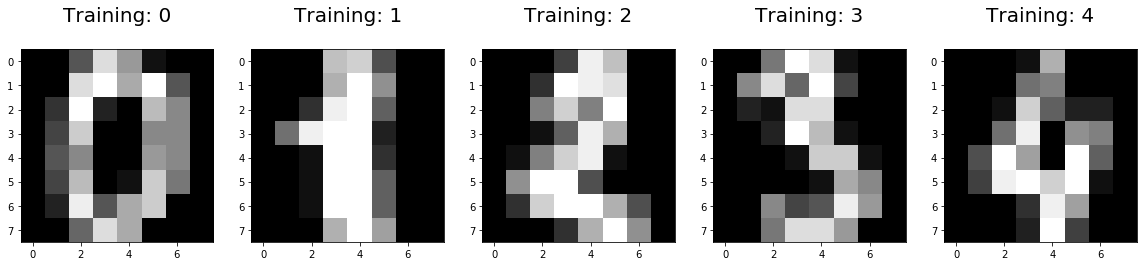

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize=20)

### Divisão de Dados em Conjuntos de Treinamento e Teste

Fazemos conjuntos de treinamento e teste para garantir que, depois de treinar nosso algoritmo de classificação, ele seja capaz de generalizar bem para novos dados.

In [5]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Modelando

Uma vez que nossos dados estão divididos, vamos instanciar o nosso modelo e ajustar os dados nele para o treinamento.

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='newton-cg')

Com o modelo instanciado, podemos treiná-lo nos dados, armazenando assim as informações aprendidas com os dados.

O modelo irá aprender a relação entre os dígitos (**X_train**) e os labels (**y_train**).

In [7]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Agora podemos prever **labels** para novos dados (novas imagens).

O algoritmo usará as informações que aprendeu durante o processo de treinamento.

In [8]:
log_reg.predict(X_test[0].reshape(1,-1))[0]

5

Podemos confirmar se o nosso modelo foi capaz de acertar este exemplo.

In [9]:
print(y_test[0])

5


Como podemos ver, ele foi correto em sua previsão.

Também é possível prever múltiplas observações (imagens) de uma só vez.

In [10]:
predictions = log_reg.predict(X_test)
predictions[:10]

array([5, 8, 8, 9, 9, 4, 5, 4, 2, 5])

### Medindo a Perfomance do Modelo

Embora existam outras maneiras de medir o desempenho do modelo (precision, recall, F1 score, ROC curve, etc), vamos manter este tutorial simples e usar a **accuracy** como nossa métrica.

Para fazer isso, veremos o desempenho do modelo nos novos dados (conjunto de teste) a accuracy é definida como:

- (fração de previsões corretas): previsões corretas **/** número total de pontos de dados

Usamos o método **score** para obter a accuracy do modelo.

In [11]:
score = log_reg.score(X_test, y_test)

print(score)

0.9666666666666667


Obtivemos uma accuracy de **96%**.

### Matriz de Confusão

Uma matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação (ou "classificador") em um conjunto de dados de teste para os quais os verdadeiros valores são conhecidos. 

A matriz de confusão não é visualmente super informativa ou visualmente atraente em sua forma matricial, mas podemos melhorar isso.

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  0  0  1  0]
 [ 0  0  0  0  0 42  1  0  0  2]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 1  2  0  0  0  1  0  0 41  1]
 [ 0  0  0  0  0  1  0  0  0 49]]


Como você pode ver abaixo, esse método produz uma matriz de confusão mais compreensível e visualmente legível usando a biblioteca **seaborn**.

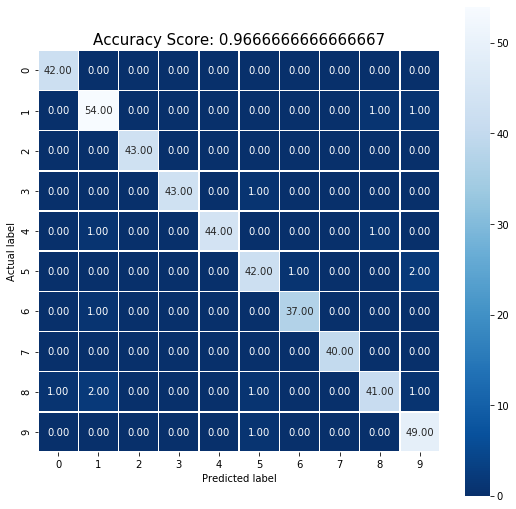

In [13]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);

### Conjunto de Dados MNIST

Um ponto importante a enfatizar que o conjunto de dados de dígitos contido no scikit-learn é muito pequeno para ser representativo de uma tarefa de Machine Learning do mundo real.

Usaremos o conjunto de dados MNIST porque é para pessoas que desejam experimentar técnicas de learning e métodos de reconhecimento de padrões em dados do mundo real, gastando esforços mínimos no pré-processamento e formatação. Uma das coisas que notaremos é que o ajuste de parâmetro pode acelerar muito o tempo de treinamento de um algoritmo de Machine Learning.

O conjunto de dados MNIST também pode ser encontrado em: [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)

Uma vez que ele não vem embutido no scikit-learn, teremos que fazer o download dele.

In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

Agora que carregamos o conjunto de dados, podemos acessar alguns atributos.

Existem 70.000 imagens (**28x28** imagens para uma dimensionalidade de 784).

In [15]:
print(mnist.data.shape)

(70000, 784)


A seguir temos os labels.

In [16]:
print(mnist.target.shape)

(70000,)


Com isso, podemos confirmar que existem 70.000 imagens e 70.000 labels neste conjunto de dados.

### Divisão de Dados em Conjuntos de Treinamento e Teste

O código abaixo divide os dados em conjuntos de dados de treinamento e teste. 

O `test_size = 1/7.0` torna o tamanho do conjunto de treinamento de 60.000 imagens e o tamanho do conjunto de teste de 10.000.

In [17]:
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0)

### Mostrando as Imagens e Labels

A seguir vamos apresentar algumas imagens do conjunto MNIST e suas respectivas labels.

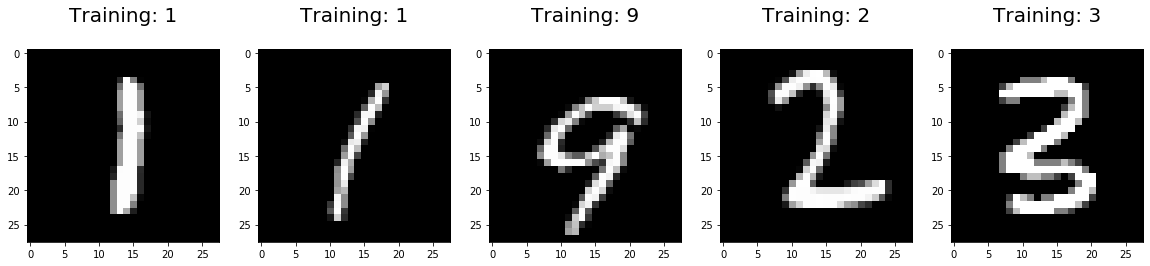

In [18]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize=20)

As diferentes classes estão distribuídas uniformemente? 

Podemos encontrar isso plotando um **histograma** dos rótulos nos conjuntos de dados de teste e treinamento.

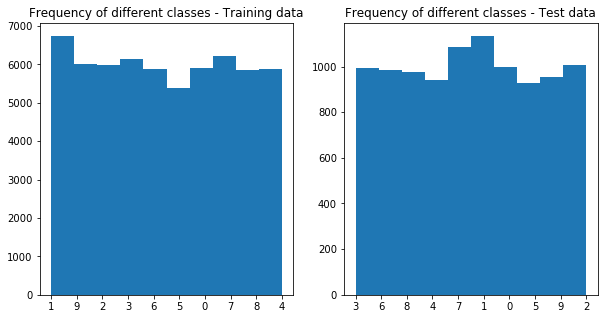

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Test data');

### Modelando

Algo que é importante mencionar é a importância do ajuste dos parâmetros. Embora possa não ter importado muito para o conjunto de dados de dígitos menores, faz uma diferença maior em conjuntos de dados maiores e mais complexos. Embora normalmente se ajuste os parâmetros por uma questão de accuracy, no caso abaixo, estamos ajustando o solucionador de parâmetros para acelerar o ajuste do modelo.

Novamente faremos uma instância do modelo de regressão logística, dessa vez com um **solver** diferente e outros parâmetros definidos.

Para saber todos os parâmetros que podem ser usados no algoritmo LogisticRegression, visite a [documentação do Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [20]:
lr = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1',
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, 
                        n_jobs=5,
                        tol=0.01)

E agora treinamos o modelo nos dados de treinamento.

In [21]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 52 epochs took 515 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  8.6min finished


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=5, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

**Observação**: Como o **verbose** é definido como `> 0`, as mensagens foram impressas, mas foram impressas no terminal, não no notebook.

Vamos ver o que o classificador aprendeu.

In [22]:
lr.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [23]:
lr.coef_.shape

(10, 784)

Número de iterações antes que a tolerância fosse alcançada.

In [24]:
lr.n_iter_[0]

52

### Previsões e Desempenho

Agora vamos prever em um conjunto de dados desconhecido e comparar com a verdade absoluta.

In [25]:
print(lr.predict(X_test[0:9]))
print(y_test[0:9])

['3' '6' '8' '5' '4' '8' '3' '4' '4']
['3' '6' '8' '8' '4' '8' '3' '4' '4']


Vejamos a pontuação em relação aos dados de treinamento e teste.

In [26]:
lr.score(X_train, y_train)

0.93695

In [29]:
score = lr.score(X_test, y_test)
score

0.922

Obtivemos uma pontuação de **92%** de acertos.

Vejamos a matriz de confusão.

In [28]:
preds = lr.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=preds, labels=lr.classes_)
cm

array([[ 960,    0,    7,    2,    0,    9,    7,    3,   10,    1],
       [   0, 1106,    6,    4,    2,    1,    1,    2,   11,    1],
       [   7,   12,  910,   19,   14,    5,    6,   13,   19,    1],
       [   3,    7,   21,  892,    1,   38,    2,    9,   16,    3],
       [   2,    6,    5,    1,  875,    3,    7,    3,    8,   33],
       [  10,    1,   11,   37,    7,  805,   18,    4,   23,   11],
       [   6,    2,    5,    2,   11,   10,  939,    1,    9,    0],
       [   3,    4,   14,   10,    7,    1,    0, 1009,    0,   36],
       [   7,   19,   11,   27,    6,   24,    6,    5,  861,    9],
       [   4,    6,    3,   13,   22,    6,    0,   31,    7,  863]])

Com a biblioteca **seaborn** para melhor visualização.

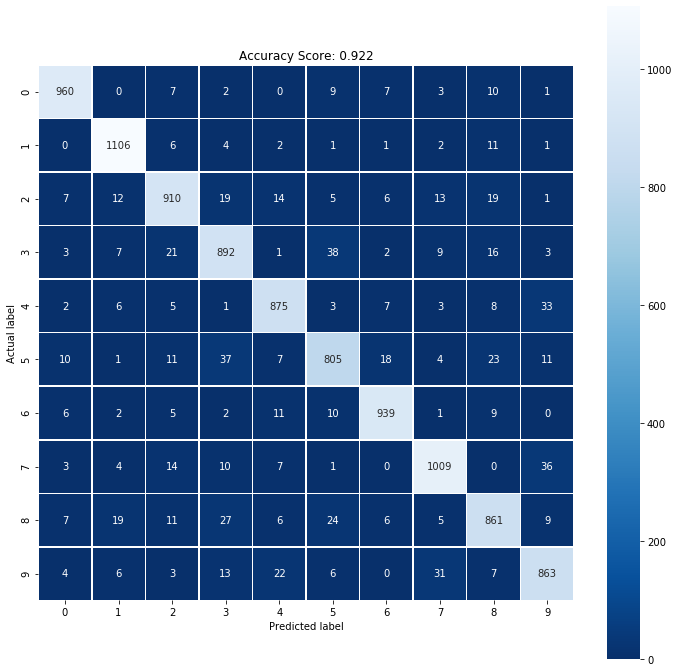

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

Este notebook mostra a realização de classificação multi-classe usando regressão logística através da técnica **one-vs-all**. 

Quando executado no conjunto de dados MNIST, a melhor accuracy ainda é de apenas 92%. 

Ainda há espaço para melhorias. Bons estudos!

### Referências

- [MNIST digits classification using logistic regression from Scikit-Learn](https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/)
- [Logistic Regression using Python (Scikit-Learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)